In [4]:
import xarray as xr
import matplotlib.pyplot as plt
import netCDF4 as nc
import numpy as np
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import os

In [ ]:
Note: Doing it this way runs out of memory on ARC4

In [3]:
# def plot_monthly_avg_temperature_level(files_path, target_month, level_idx):
#     # Select files for the specified month
#     file_list = sorted(
#         [os.path.join(files_path, f) for f in os.listdir(files_path) 
#          if f.endswith('.nc') and f"{target_month}-" in f and f'.h2.' in f]
#     )

#     if not file_list:
#         print(f"No files found for the month {target_month}.")
#         return

#     # Load datasets and extract the temperature variable
#     temp_datasets = []
#     for file in file_list:
#         ds = xr.open_dataset(file)
#         if 'T' in ds:
#             # print(ds.T)
#             temp_datasets.append(ds.T)

#     # Check if any temperature data was found
#     if not temp_datasets:
#         print(f"No temperature data found in the files for {target_month}.")
#         return

#     # Concatenate datasets along the time dimension and compute the monthly average
#     combined_temp = xr.concat(temp_datasets, dim='time')
#     temp_month_avg = combined_temp.mean(dim='time').isel(lev=level_idx)

#     # Plot the temperature map
#     fig = plt.figure(figsize=(15, 10))
#     ax = plt.axes(projection=ccrs.Robinson())

#     # Add map features
#     ax.add_feature(cfeature.COASTLINE)
#     ax.add_feature(cfeature.BORDERS, linestyle=':')

#     # Create temperature plot
#     mesh = ax.pcolormesh(ds.lon, ds.lat, temp_month_avg,
#                          transform=ccrs.PlateCarree(),
#                          cmap='RdBu_r',
#                          vmin=float(temp_month_avg.min()),
#                          vmax=float(temp_month_avg.max()))

#     # Add colorbar
#     plt.colorbar(mesh, ax=ax, label='Temperature (K)')

#     z3_var = ds.variables['Z3']

#     time_idx = 1
    
#     h_geopotential = z3_var[time_idx, level_idx, :, :]
    
#     z_geometric = (R_e * h_geopotential) / (R_e - h_geopotential)
    
#     mean_altitude_m = np.mean(z_geometric)
#     mean_altitude_km = mean_altitude_m / 1000.0

#     # Set title
#     plt.title(f'Monthly Average Temperature at height {mean_altitude_km:.2f} km for {target_month}')
#     plt.show()
#     return temp_month_avg

In [4]:
# month = '02'
# level = 125

# path_to_daily_files_2100 = f"/resstore/b0243/Data/earfw/FX2100f19f19mg16NaFeMgiontransport/hist/"
# temp_month_avg_2100 = plot_monthly_avg_temperature_level(path_to_daily_files_2100, target_month=f'2100-{month}', level_idx=level)
# path_to_daily_files_2000 = f"/resstore/b0243/Data/Sporadic_E/Solar_Med/archive_yr2000/"
# temp_month_avg_2000 = plot_monthly_avg_temperature_level(path_to_daily_files_2000, target_month=f'0001-{month}', level_idx=level)
# temp_month_diff = temp_month_avg_2100 - temp_month_avg_2000
# temp_month_diff.lev.values

# fig = plt.figure(figsize=(15, 10))
# ax = plt.axes(projection=ccrs.Robinson())

# # Add map features
# ax.add_feature(cfeature.COASTLINE)
# ax.add_feature(cfeature.BORDERS, linestyle=':')

# # Create temperature plot
# mesh = ax.pcolormesh(temp_month_diff.lon, temp_month_diff.lat, temp_month_diff,
#                      transform=ccrs.PlateCarree(),
#                      cmap='RdBu_r',
#                      vmin=float(temp_month_diff.min()),
#                      vmax=float(temp_month_diff.max()))

# plt.colorbar(mesh, ax=ax, label='Temperature (K)')

# # Set title
# plt.title(f'Monthly Average Temperature Difference (yr2100 - yr2000) at {temp_month_diff.lev.values} hPa for {month}')
# plt.show()

MemoryError: Unable to allocate 4.36 GiB for an array with shape (672, 126, 96, 144) and data type float32

In [5]:
def plot_monthly_avg_temperature_level(files_path, target_month, level_idx):
    """
    Plot the average temperature for a specified month at a given vertical level.

    Parameters:
    - files_path: Directory containing daily NetCDF files.
    - target_month: Month as a string in "YYYY-MM" format (e.g., "2100-01").
    - level_idx: Index of the vertical level to plot.
    """
    # Select files for the specified month
    file_list = sorted(
        [os.path.join(files_path, f) for f in os.listdir(files_path) 
         if f.endswith('.nc') and f"{target_month}-" in f and f'.h2.' in f]
    )

    if not file_list:
        print(f"No files found for the month {target_month}.")
        return

    # Load datasets and extract the temperature variable
    temp_datasets = []
    for file in file_list:
        ds = xr.open_dataset(file)
        if 'T' in ds:
            # print(ds.T)
            temp_datasets.append(ds.T)

    # Check if any temperature data was found
    if not temp_datasets:
        print(f"No temperature data found in the files for {target_month}.")
        return

    # Concatenate datasets along the time dimension and compute the monthly average
    combined_temp = xr.concat(temp_datasets, dim='time')
    temp_month_avg = combined_temp.mean(dim='time').isel(lev=level_idx)

    # Plot the temperature map
    fig = plt.figure(figsize=(15, 10))
    ax = plt.axes(projection=ccrs.Robinson())

    # Add map features
    ax.add_feature(cfeature.COASTLINE)
    ax.add_feature(cfeature.BORDERS, linestyle=':')

    # Create temperature plot
    mesh = ax.pcolormesh(ds.lon, ds.lat, temp_month_avg,
                         transform=ccrs.PlateCarree(),
                         cmap='RdBu_r',
                         vmin=float(temp_month_avg.min()),
                         vmax=float(temp_month_avg.max()))

    # Add colorbar
    plt.colorbar(mesh, ax=ax, label='Temperature (K)')

    z3_var = ds.variables['Z3']

    time_idx = 1
    
    h_geopotential = z3_var[time_idx, level_idx, :, :]

    R_e=6371000.0
    
    z_geometric = (R_e * h_geopotential) / (R_e - h_geopotential)
    
    mean_altitude_m = np.mean(z_geometric)
    mean_altitude_km = mean_altitude_m / 1000.0
    
    
    # Set title
    plt.title(f'Monthly Average Temperature at height {mean_altitude_km:.2f} km for {target_month}')
    plt.show()
    return temp_month_avg, mean_altitude_km

In [6]:
lev_idx = 52

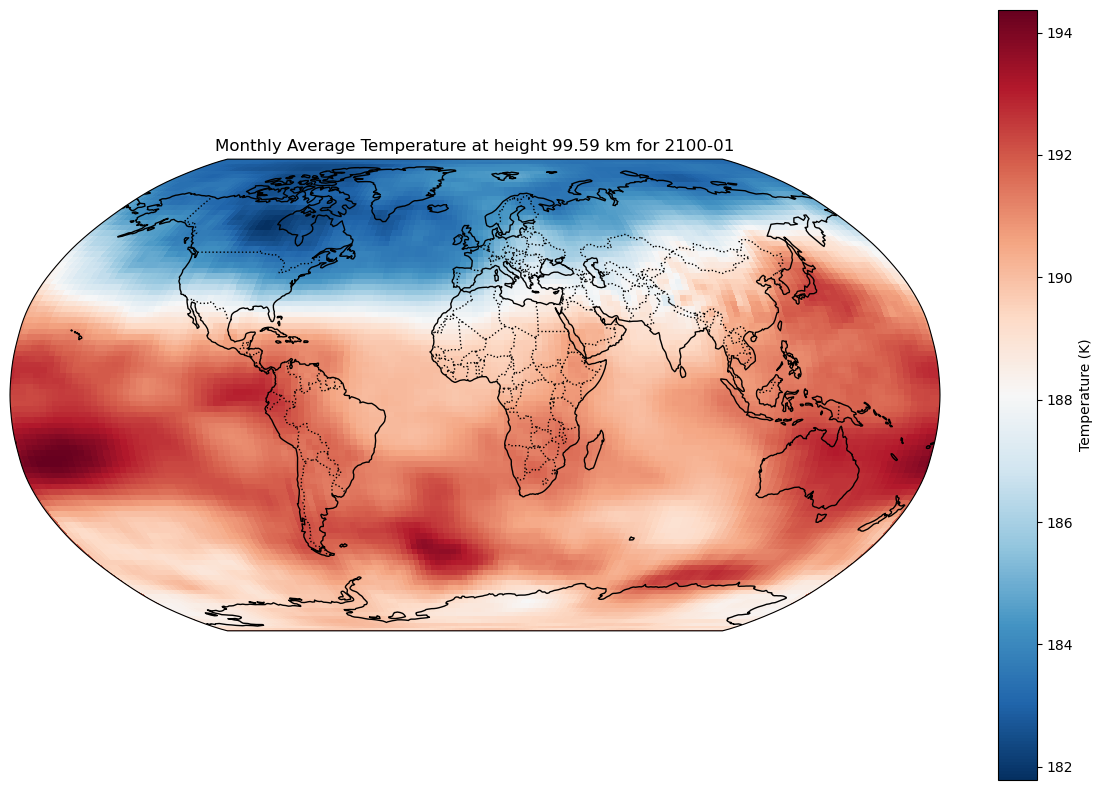

In [7]:
path_to_daily_files_2100 = f"/resstore/b0243/Data/earfw/FX2100f19f19mg16NaFeMgiontransport/hist/"
temp_month_avg_2100, alt = plot_monthly_avg_temperature_level(path_to_daily_files_2100, target_month='2100-01', level_idx=lev_idx)

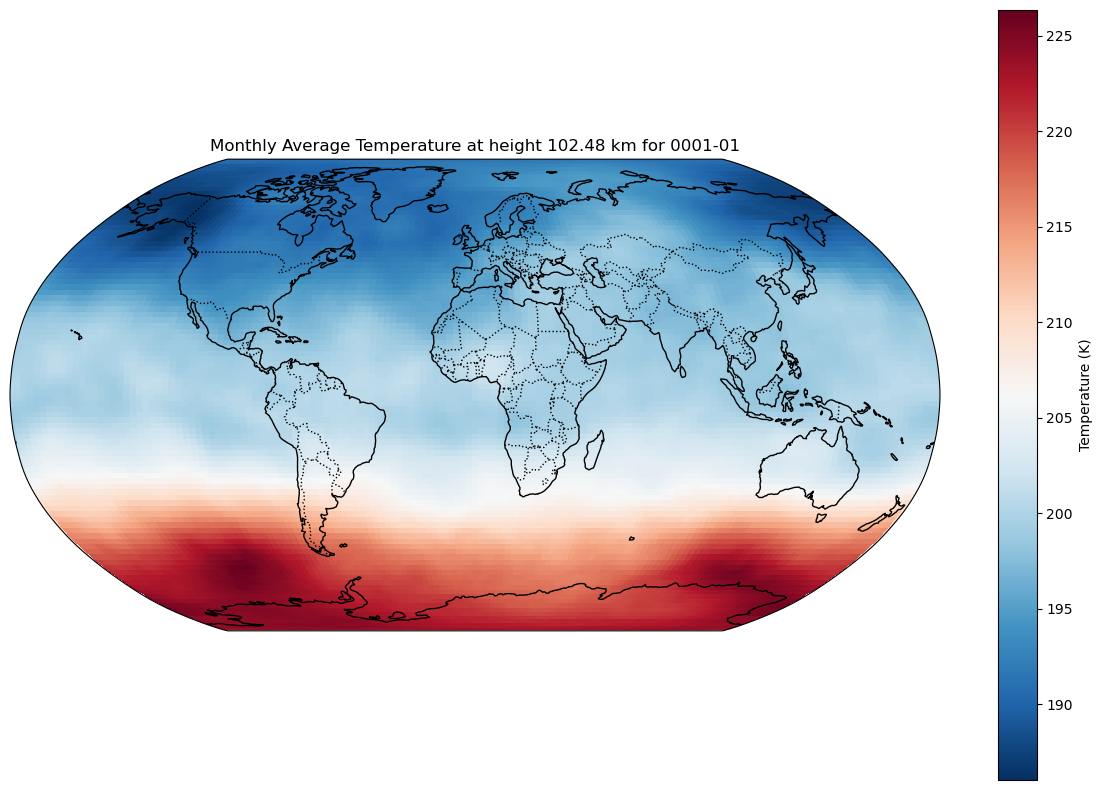

In [8]:
path_to_daily_files_2000 = f"/resstore/b0243/Data/Sporadic_E/Solar_Med/archive_yr2000/"
temp_month_avg_2000, alt = plot_monthly_avg_temperature_level(path_to_daily_files_2000, target_month='0001-01', level_idx=lev_idx)

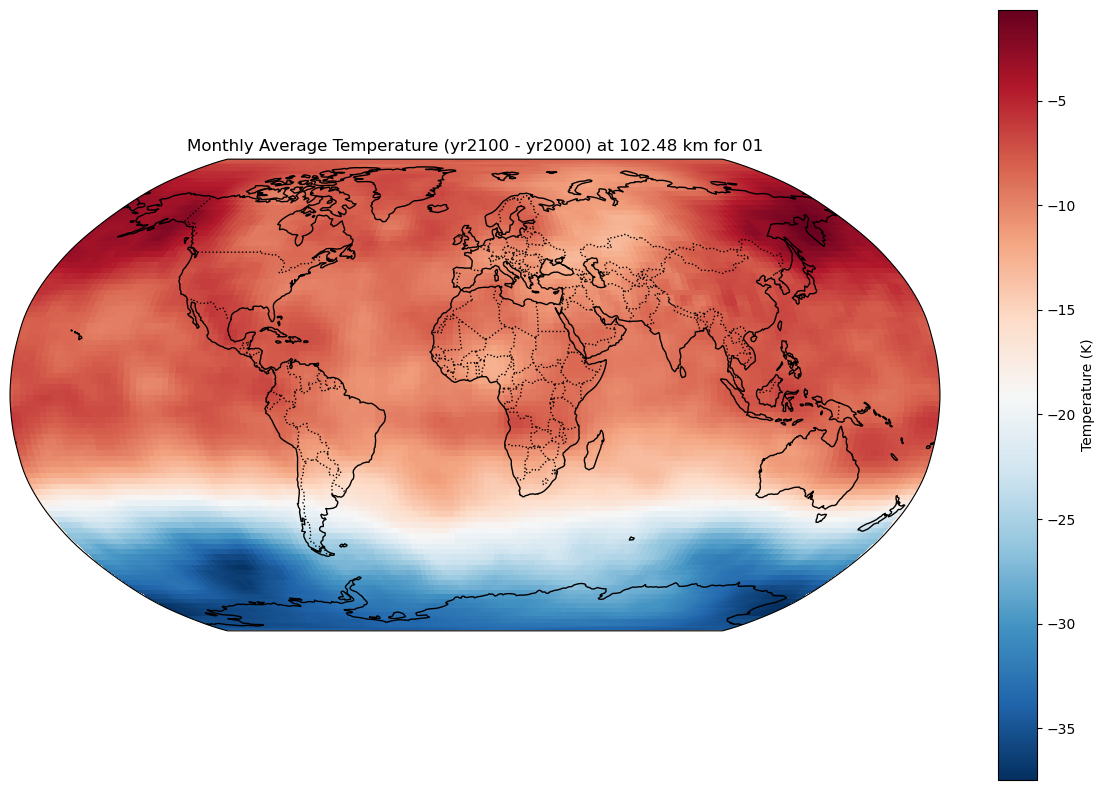

In [9]:
temp_month_diff = temp_month_avg_2100 - temp_month_avg_2000
temp_month_diff.lev.values

fig = plt.figure(figsize=(15, 10))
ax = plt.axes(projection=ccrs.Robinson())

# Add map features
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')

# Create temperature plot
mesh = ax.pcolormesh(temp_month_diff.lon, temp_month_diff.lat, temp_month_diff,
                     transform=ccrs.PlateCarree(),
                     cmap='RdBu_r',
                     vmin=float(temp_month_diff.min()),
                     vmax=float(temp_month_diff.max()))

plt.colorbar(mesh, ax=ax, label='Temperature (K)')

# Set title
plt.title(f'Monthly Average Temperature (yr2100 - yr2000) at {alt:.2f} km for 01')
plt.show()